![](itd.png)

    
# Análisis de Datos Masivos
## Proyecto Final: Análisis de Datos de SARS-CoV-2 (COVID-19)

## Nombre del docente
### José Gabriel Rodriguez Rivas
## Nombre de los alumnos:
### Calos Alberto Carrete Gómez
### Najib Alejandro Loera Rodriguez

### Se cargan las librerias y los datos que serán empleados 

In [1]:
import pandas as pd
import numpy as np
import folium
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('MARTES_COVID.csv',encoding="ISO-8859-1")
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-10,1db186,2,3,15,1,15,15,76,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-10,19b7a9,2,3,27,2,27,27,13,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-10,1ae47a,2,4,9,1,14,9,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-08-10,0e345e,2,4,30,1,30,30,193,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-10,170aea,2,4,9,2,15,15,104,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97


#### Se obtiene información acerca del DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097077 entries, 0 to 1097076
Data columns (total 35 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   FECHA_ACTUALIZACION  1097077 non-null  object
 1   ID_REGISTRO          1097077 non-null  object
 2   ORIGEN               1097077 non-null  int64 
 3   SECTOR               1097077 non-null  int64 
 4   ENTIDAD_UM           1097077 non-null  int64 
 5   SEXO                 1097077 non-null  int64 
 6   ENTIDAD_NAC          1097077 non-null  int64 
 7   ENTIDAD_RES          1097077 non-null  int64 
 8   MUNICIPIO_RES        1097077 non-null  int64 
 9   TIPO_PACIENTE        1097077 non-null  int64 
 10  FECHA_INGRESO        1097077 non-null  object
 11  FECHA_SINTOMAS       1097077 non-null  object
 12  FECHA_DEF            1097077 non-null  object
 13  INTUBADO             1097077 non-null  int64 
 14  NEUMONIA             1097077 non-null  int64 
 15  EDAD           

In [4]:
len(df) #Se saca el total de registros entre casos positivos, negativos y pendientes

1097077

In [5]:
df['SEXO'].value_counts() #Se utiliaz para saber cuantos son hombres y mujeres y para
                          #saber si hay un género no especificado

1    551152
2    545925
Name: SEXO, dtype: int64

#### Se reemplaza los datos de sexo para que sea mas claro el DataFrame
    1 = Mujer y 2 = Hombre

In [6]:
df['SEXO'] = df['SEXO'].apply(lambda toLabel: 'MUJER' if toLabel==1 else 
                             ('HOMBRE' if toLabel==2 else 'NO ESPECIFICADO'))
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-10,1db186,2,3,15,MUJER,15,15,76,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-10,19b7a9,2,3,27,HOMBRE,27,27,13,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-10,1ae47a,2,4,9,MUJER,14,9,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-08-10,0e345e,2,4,30,MUJER,30,30,193,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-10,170aea,2,4,9,HOMBRE,15,15,104,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97


In [7]:
#Filtro para obtener casos positivos covid
df_covid_positivos = df['RESULTADO']==1
df_covid_positivos = df[df_covid_positivos]

In [8]:
df_covid_positivos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-10,1db186,2,3,15,MUJER,15,15,76,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-10,19b7a9,2,3,27,HOMBRE,27,27,13,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-10,1ae47a,2,4,9,MUJER,14,9,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-08-10,0e345e,2,4,30,MUJER,30,30,193,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-10,170aea,2,4,9,HOMBRE,15,15,104,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97


#### Se obtiene la correlación de casos positivos con ciertas columnas en específico

In [9]:
positivos_correlacion = df_covid_positivos[['EDAD','OBESIDAD','NEUMONIA','DIABETES','HIPERTENSION','EPOC','ASMA','SEXO','INTUBADO','EMBARAZO',
                                           'RENAL_CRONICA','TABAQUISMO','CARDIOVASCULAR']] 
positivos_correlacion.head()

,EDAD,OBESIDAD,NEUMONIA,DIABETES,HIPERTENSION,EPOC,ASMA,SEXO,INTUBADO,EMBARAZO,RENAL_CRONICA,TABAQUISMO,CARDIOVASCULAR
0,33,1,2,1,2,2,2,MUJER,97,2,2,2,2
1,54,2,2,2,2,2,2,HOMBRE,97,97,2,2,2
2,55,2,2,2,2,2,2,MUJER,97,2,2,2,2
3,38,2,2,2,2,2,2,MUJER,97,2,2,2,2
4,70,2,1,1,1,2,2,HOMBRE,97,97,2,1,2


In [10]:
len(positivos_correlacion) #Longitud de la correlación

485836

#### Se genera la correlación y un mapa de calor

In [11]:
corr = positivos_correlacion.corr('pearson')
corr.style.background_gradient(cmap='Reds', axis=None)
#CORRELACIÓN DE PERSONAS POSITIVAS A COVID-19

,EDAD,OBESIDAD,NEUMONIA,DIABETES,HIPERTENSION,EPOC,ASMA,INTUBADO,EMBARAZO,RENAL_CRONICA,TABAQUISMO,CARDIOVASCULAR
EDAD,1.000000,0.009519,-0.262917,-0.007312,-0.016889,0.009352,0.013922,-0.399317,0.043597,0.012087,0.013622,0.011288
OBESIDAD,0.009519,1.000000,-0.009976,0.758458,0.811463,0.826288,0.836153,-0.011694,0.014720,0.841677,0.807397,0.830595
NEUMONIA,-0.262917,-0.009976,1.000000,0.000763,0.001642,-0.008898,-0.010712,0.530537,-0.067230,-0.008753,-0.010826,-0.011177
DIABETES,-0.007312,0.758458,0.000763,1.000000,0.850326,0.842009,0.845223,0.003694,0.012950,0.816869,0.782214,0.813351
HIPERTENSION,-0.016889,0.811463,0.001642,0.850326,1.000000,0.872934,0.884048,0.004807,0.014008,0.868632,0.823839,0.867383
EPOC,0.009352,0.826288,-0.008898,0.842009,0.872934,1.000000,0.927788,-0.010785,0.013324,0.894870,0.852655,0.888777
ASMA,0.013922,0.836153,-0.010712,0.845223,0.884048,0.927788,1.000000,-0.013901,0.014712,0.909281,0.862281,0.901523
INTUBADO,-0.399317,-0.011694,0.530537,0.003694,0.004807,-0.010785,-0.013901,1.000000,-0.097624,-0.011282,-0.013957,-0.013915
EMBARAZO,0.043597,0.014720,-0.067230,0.012950,0.014008,0.013324,0.014712,-0.097624,1.000000,0.013018,0.010061,0.012831
RENAL_CRONICA,0.012087,0.841677,-0.008753,0.816869,0.868632,0.894870,0.909281,-0.011282,0.013018,1.000000,0.872402,0.907276


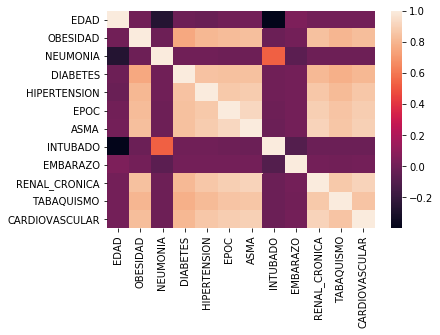

In [12]:
sns.heatmap(corr)
plt.savefig('covid_positive.png', tight_layout=True)

#### Se obtiene la correlación de casos positivos con ciertas columnas en específico

In [13]:
covidFallecido = df_covid_positivos['FECHA_DEF']!='9999-99-99'
covidFallecido = df_covid_positivos[covidFallecido]
fallecidos_correlacion = covidFallecido[['EDAD','OBESIDAD','NEUMONIA','DIABETES','HIPERTENSION','EPOC','ASMA','SEXO','INTUBADO','EMBARAZO',
                                           'RENAL_CRONICA','TABAQUISMO','CARDIOVASCULAR']] 
fallecidos_correlacion.head()

,EDAD,OBESIDAD,NEUMONIA,DIABETES,HIPERTENSION,EPOC,ASMA,SEXO,INTUBADO,EMBARAZO,RENAL_CRONICA,TABAQUISMO,CARDIOVASCULAR
1,54,2,2,2,2,2,2,HOMBRE,97,97,2,2,2
4,70,2,1,1,1,2,2,HOMBRE,97,97,2,1,2
6,69,2,2,1,2,2,2,MUJER,2,2,2,2,2
7,67,2,1,2,2,2,2,HOMBRE,2,97,2,1,2
8,63,2,2,1,2,2,2,HOMBRE,97,97,2,2,2


In [14]:
len(covidFallecido)

53003

#### Se genera la correlación y un mapa de calor

In [15]:
corr_fallecidos = fallecidos_correlacion.corr('pearson')
corr_fallecidos.style.background_gradient(cmap='Reds', axis=None)
#CORRELACIÓN DE PERSONAS POSITIVAS A COVID-19 (PERSONAS FALLECIDAS)

,EDAD,OBESIDAD,NEUMONIA,DIABETES,HIPERTENSION,EPOC,ASMA,INTUBADO,EMBARAZO,RENAL_CRONICA,TABAQUISMO,CARDIOVASCULAR
EDAD,1.000000,-0.006692,0.005588,-0.019017,-0.030012,-0.015729,-0.012739,-0.019619,-0.057791,-0.010898,-0.015665,-0.014685
OBESIDAD,-0.006692,1.000000,-0.023067,0.632111,0.681919,0.685138,0.700394,0.003356,0.011451,0.718573,0.690113,0.701861
NEUMONIA,0.005588,-0.023067,1.000000,-0.014186,-0.014744,-0.015573,-0.015225,0.169613,-0.003332,-0.015555,-0.015265,-0.018042
DIABETES,-0.019017,0.632111,-0.014186,1.000000,0.857196,0.810657,0.824015,0.011929,0.012405,0.787347,0.763701,0.777911
HIPERTENSION,-0.030012,0.681919,-0.014744,0.857196,1.000000,0.853515,0.863845,0.009451,0.014206,0.842683,0.814425,0.842279
EPOC,-0.015729,0.685138,-0.015573,0.810657,0.853515,1.000000,0.921419,0.009170,0.007382,0.868221,0.846730,0.860296
ASMA,-0.012739,0.700394,-0.015225,0.824015,0.863845,0.921419,1.000000,0.011296,0.006648,0.896450,0.857064,0.877700
INTUBADO,-0.019619,0.003356,0.169613,0.011929,0.009451,0.009170,0.011296,1.000000,0.010840,0.010538,0.008360,0.009013
EMBARAZO,-0.057791,0.011451,-0.003332,0.012405,0.014206,0.007382,0.006648,0.010840,1.000000,0.005450,0.005344,0.001560
RENAL_CRONICA,-0.010898,0.718573,-0.015555,0.787347,0.842683,0.868221,0.896450,0.010538,0.005450,1.000000,0.878722,0.895146


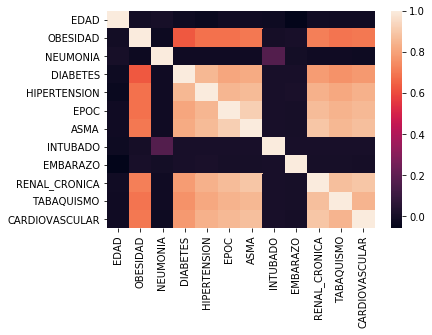

In [16]:
sns.heatmap(corr_fallecidos)
plt.savefig('covid_positive_died.png', tight_layout=True)

#### Se obtiene el número agrupado de casos positivos, negativos y en curso

In [17]:
df_cases_divided = df.groupby(['RESULTADO']).size().reset_index(name='TOTAL')
df_cases_divided['RESULTADO'] = df_cases_divided['RESULTADO'].apply(lambda toLabel: 'POSITIVO' if toLabel==1 else
                                                      ('NEGATIVO' if toLabel==2 else 'EN CURSO'))
df_cases_divided

,RESULTADO,TOTAL
0,POSITIVO,485836
1,NEGATIVO,532028
2,EN CURSO,79213


#### Se realiza una gráfica de como se encuentra la distribución de casos positivos, negativos y pendientes o en curso

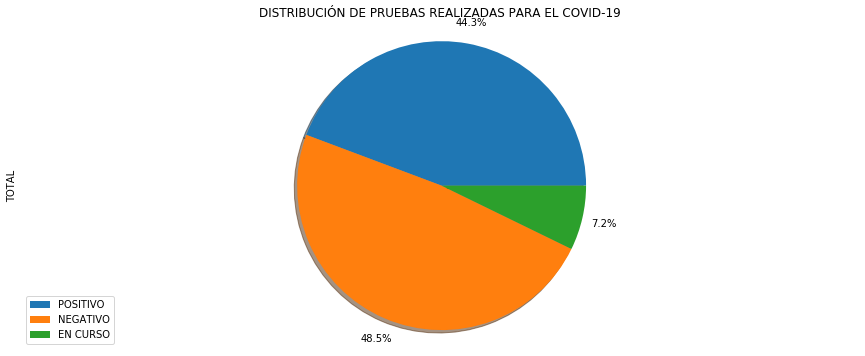

In [18]:

df_cases_divided['TOTAL'].plot(kind='pie', figsize=(15,6), autopct='%1.1f%%', startangle=0,shadow=True, labels=None,
                            pctdistance=1.15)
plt.axis('equal')
plt.legend(labels=df_cases_divided['RESULTADO'],loc='lower left')
plt.title('DISTRIBUCIÓN DE PRUEBAS REALIZADAS PARA EL COVID-19')
plt.show()


In [19]:

df_total_casos_grupo = df.groupby(['RESULTADO','SEXO']).size().reset_index(name='TOTAL')


#### Se muestra la distribución de casos separado por género
    1 = Positivo
    2 = Negativo
    3 = En Curso

In [20]:
df_total_casos_grupo

,RESULTADO,SEXO,TOTAL
0,1,HOMBRE,257168
1,1,MUJER,228668
2,2,HOMBRE,248629
3,2,MUJER,283399
4,3,HOMBRE,40128
5,3,MUJER,39085


In [21]:
#Se obtiene máximos y mínimos y el promedio
df_max = df_covid_positivos['EDAD'].max() #Se obtiene cual es el valor más alto en edad
df_min = df_covid_positivos['EDAD'].min() #Se obtiene cual es el valor más bajo en edad
df_prom = df_covid_positivos['EDAD'].mean() #Se obtiene el promedio
df_prom_todo = df['EDAD'].mean() #Se obtiene el promedio

In [22]:
df_max

118

In [23]:
df_min

0

In [24]:
df_prom

45.13848500316979

In [25]:
df_prom_todo

42.48960920701099

In [26]:
type(df_covid_positivos)

pandas.core.frame.DataFrame

#### Se realiza la agrupación por edades

In [27]:
#Grupo y rangos de edades
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
names= ['0-10 años', '11-20 años', '21-30 años', '31-40 años','41-50 años','51-60 años',
        '61-70 años', '71-80 años', '81-90 años','91-100 años','101-110 años','111-120 años']
#df['Rango'] = pd.cut(df['EDAD'],bins,labels=names)
df_covid_positivos['Rango'] = pd.cut(df_covid_positivos['EDAD'],bins,labels=names)
covidFallecido['Rango'] = pd.cut(covidFallecido['EDAD'],bins,labels=names)
df_covid_positivos

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Rango
0,2020-08-10,1db186,2,3,15,MUJER,15,15,76,1,...,1,2,2,1,1,99,MÃ©xico,99,97,31-40 años
1,2020-08-10,19b7a9,2,3,27,HOMBRE,27,27,13,1,...,2,2,2,1,1,99,MÃ©xico,99,97,51-60 años
2,2020-08-10,1ae47a,2,4,9,MUJER,14,9,5,1,...,2,2,2,99,1,99,MÃ©xico,99,97,51-60 años
3,2020-08-10,0e345e,2,4,30,MUJER,30,30,193,1,...,2,2,2,99,1,99,MÃ©xico,99,97,31-40 años
4,2020-08-10,170aea,2,4,9,HOMBRE,15,15,104,1,...,2,2,1,99,1,99,MÃ©xico,99,97,61-70 años
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836138,2020-08-10,0d7875,2,12,9,HOMBRE,9,9,9,1,...,2,2,2,1,1,99,MÃ©xico,99,97,21-30 años
836139,2020-08-10,115a03,1,4,18,HOMBRE,18,18,17,1,...,2,2,2,99,1,99,MÃ©xico,99,97,21-30 años
836140,2020-08-10,1e6278,1,4,2,MUJER,2,2,2,2,...,2,2,2,99,1,99,MÃ©xico,99,2,31-40 años
836141,2020-08-10,1cc078,2,12,20,MUJER,99,20,401,1,...,2,2,2,2,1,2,Suiza,99,97,31-40 años


In [28]:
df_rangos = df_covid_positivos.groupby(['Rango','SEXO']).size().reset_index(name='Total')
df_rangos

,Rango,SEXO,Total
0,0-10 años,HOMBRE,2458
1,0-10 años,MUJER,2200
2,11-20 años,HOMBRE,6919
3,11-20 años,MUJER,7403
4,21-30 años,HOMBRE,38591
5,21-30 años,MUJER,39813
6,31-40 años,HOMBRE,56352
7,31-40 años,MUJER,51971
8,41-50 años,HOMBRE,55950
9,41-50 años,MUJER,49715


#### Se filtra los datos para mujeres (Casos Positivos)

In [29]:
df_rangosM = df_rangos['SEXO']=='MUJER'
df_rangosM = df_rangos[df_rangosM]
df_rangosM

,Rango,SEXO,Total
1,0-10 años,MUJER,2200
3,11-20 años,MUJER,7403
5,21-30 años,MUJER,39813
7,31-40 años,MUJER,51971
9,41-50 años,MUJER,49715
11,51-60 años,MUJER,38194
13,61-70 años,MUJER,22675
15,71-80 años,MUJER,11384
17,81-90 años,MUJER,4230
19,91-100 años,MUJER,602


In [30]:
df_rangosM.set_index('Rango')
df_rangosM = df_rangosM.set_index('Rango')
df_rangosM = df_rangosM.iloc[0:,1]
df_rangosM

Rango
0-10 años        2200
11-20 años       7403
21-30 años      39813
31-40 años      51971
41-50 años      49715
51-60 años      38194
61-70 años      22675
71-80 años      11384
81-90 años       4230
91-100 años       602
101-110 años       18
111-120 años        0
Name: Total, dtype: int64

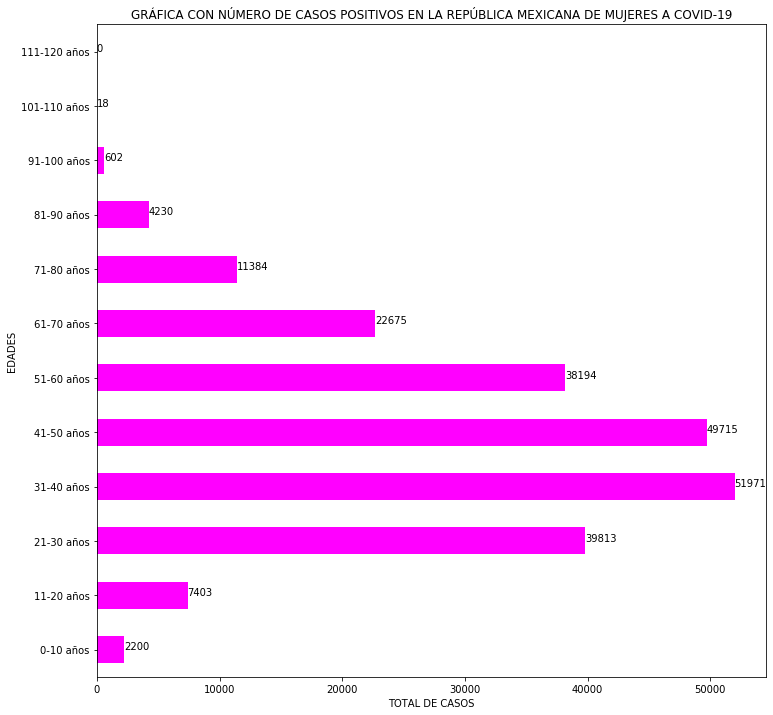

In [31]:
df_rangosM.plot(kind='barh',figsize=(12,12),color='magenta')
plt.xlabel('TOTAL DE CASOS')
plt.ylabel('EDADES')
plt.title('GRÁFICA CON NÚMERO DE CASOS POSITIVOS EN LA REPÚBLICA MEXICANA DE MUJERES A COVID-19')
for index, value in enumerate(df_rangosM):
    plt.text(value, index, str(value)) #es una forma para mostrar los valores o también la que se encuentra a 
    #continuación
    #plt.annotate(label,xy=(value,index), color='black')
plt.show()

#### Se filtra los datos para hombres (Casos Positivos)

In [32]:
df_rangosH = df_rangos['SEXO']=='HOMBRE'
df_rangosH = df_rangos[df_rangosH]
df_rangosH

,Rango,SEXO,Total
0,0-10 años,HOMBRE,2458
2,11-20 años,HOMBRE,6919
4,21-30 años,HOMBRE,38591
6,31-40 años,HOMBRE,56352
8,41-50 años,HOMBRE,55950
10,51-60 años,HOMBRE,46304
12,61-70 años,HOMBRE,29067
14,71-80 años,HOMBRE,15062
16,81-90 años,HOMBRE,5293
18,91-100 años,HOMBRE,632


In [33]:
df_rangosH.set_index('Rango')
df_rangosH = df_rangosH.set_index('Rango')
df_rangosH = df_rangosH.iloc[0:,1]
df_rangosH

Rango
0-10 años        2458
11-20 años       6919
21-30 años      38591
31-40 años      56352
41-50 años      55950
51-60 años      46304
61-70 años      29067
71-80 años      15062
81-90 años       5293
91-100 años       632
101-110 años       16
111-120 años        4
Name: Total, dtype: int64

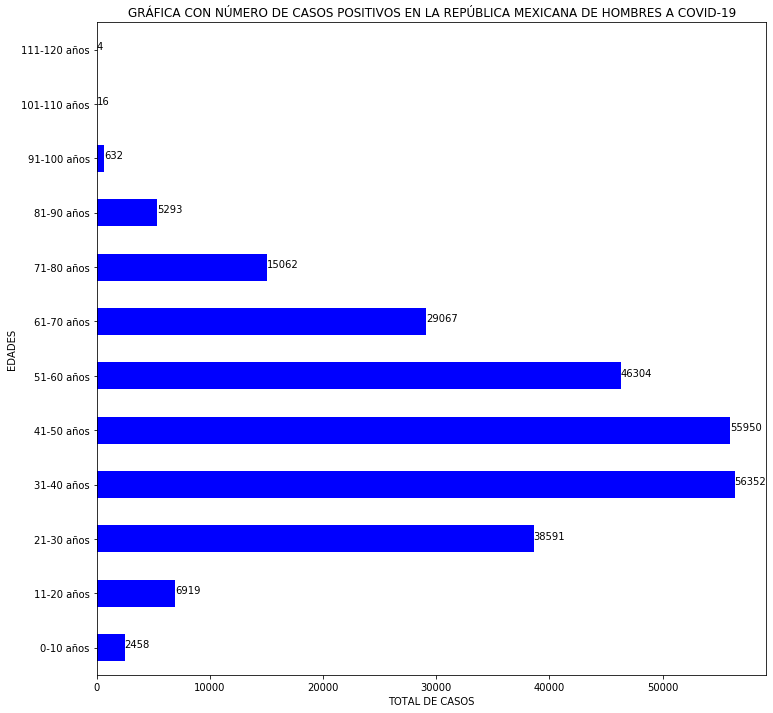

In [34]:
df_rangosH.plot(kind='barh',figsize=(12,12),color='blue')
plt.xlabel('TOTAL DE CASOS')
plt.ylabel('EDADES')
plt.title('GRÁFICA CON NÚMERO DE CASOS POSITIVOS EN LA REPÚBLICA MEXICANA DE HOMBRES A COVID-19')
for index, value in enumerate(df_rangosH):
    plt.text(value, index, str(value)) #es una forma para mostrar los valores o también la que se encuentra a 
    #continuación
    #plt.annotate(label,xy=(value,index), color='black')
plt.show()

#### Se procede a realizar el mismo tipo de gráfica, pero ahora para personas fallecidas

In [35]:
df_rangos_fallecidos = covidFallecido.groupby(['Rango','SEXO']).size().reset_index(name='Total')
df_rangos_fallecidos

,Rango,SEXO,Total
0,0-10 años,HOMBRE,45
1,0-10 años,MUJER,41
2,11-20 años,HOMBRE,55
3,11-20 años,MUJER,55
4,21-30 años,HOMBRE,495
5,21-30 años,MUJER,277
6,31-40 años,HOMBRE,1937
7,31-40 años,MUJER,785
8,41-50 años,HOMBRE,4994
9,41-50 años,MUJER,2199


#### Se filtra los datos para mujeres (Fallecidas)

In [36]:
df_rangosM_fallecidas = df_rangos_fallecidos['SEXO']=='MUJER'
df_rangosM_fallecidas = df_rangos_fallecidos[df_rangosM_fallecidas]
df_rangosM_fallecidas

,Rango,SEXO,Total
1,0-10 años,MUJER,41
3,11-20 años,MUJER,55
5,21-30 años,MUJER,277
7,31-40 años,MUJER,785
9,41-50 años,MUJER,2199
11,51-60 años,MUJER,4201
13,61-70 años,MUJER,5320
15,71-80 años,MUJER,3941
17,81-90 años,MUJER,1680
19,91-100 años,MUJER,219


In [37]:
df_rangosM_fallecidas.set_index('Rango')
df_rangosM_fallecidas = df_rangosM_fallecidas.set_index('Rango')
df_rangosM_fallecidas = df_rangosM_fallecidas.iloc[0:,1]
df_rangosM_fallecidas

Rango
0-10 años         41
11-20 años        55
21-30 años       277
31-40 años       785
41-50 años      2199
51-60 años      4201
61-70 años      5320
71-80 años      3941
81-90 años      1680
91-100 años      219
101-110 años       4
111-120 años       0
Name: Total, dtype: int64

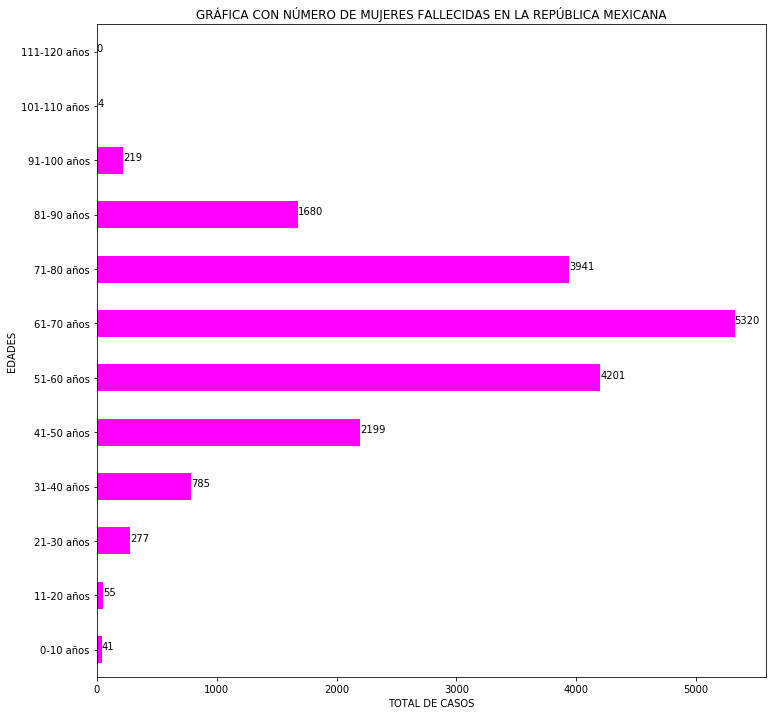

In [38]:
df_rangosM_fallecidas.plot(kind='barh',figsize=(12,12),color='magenta')
plt.xlabel('TOTAL DE CASOS')
plt.ylabel('EDADES')
plt.title('GRÁFICA CON NÚMERO DE MUJERES FALLECIDAS EN LA REPÚBLICA MEXICANA')
for index, value in enumerate(df_rangosM_fallecidas):
    plt.text(value, index, str(value)) #es una forma para mostrar los valores o también la que se encuentra a 
    #continuación
    #plt.annotate(label,xy=(value,index), color='black')
plt.show()

#### Se filtra los datos para hombres (Fallecidos)

In [39]:
df_rangosH_fallecidos = df_rangos_fallecidos['SEXO']=='HOMBRE'
df_rangosH_fallecidos = df_rangos_fallecidos[df_rangosH_fallecidos]
df_rangosH_fallecidos

,Rango,SEXO,Total
0,0-10 años,HOMBRE,45
2,11-20 años,HOMBRE,55
4,21-30 años,HOMBRE,495
6,31-40 años,HOMBRE,1937
8,41-50 años,HOMBRE,4994
10,51-60 años,HOMBRE,8471
12,61-70 años,HOMBRE,9083
14,71-80 años,HOMBRE,6343
16,81-90 años,HOMBRE,2499
18,91-100 años,HOMBRE,310


In [40]:
df_rangosH_fallecidos.set_index('Rango')
df_rangosH_fallecidos = df_rangosH_fallecidos.set_index('Rango')
df_rangosH_fallecidos = df_rangosH_fallecidos.iloc[0:,1]
df_rangosH_fallecidos

Rango
0-10 años         45
11-20 años        55
21-30 años       495
31-40 años      1937
41-50 años      4994
51-60 años      8471
61-70 años      9083
71-80 años      6343
81-90 años      2499
91-100 años      310
101-110 años       2
111-120 años       0
Name: Total, dtype: int64

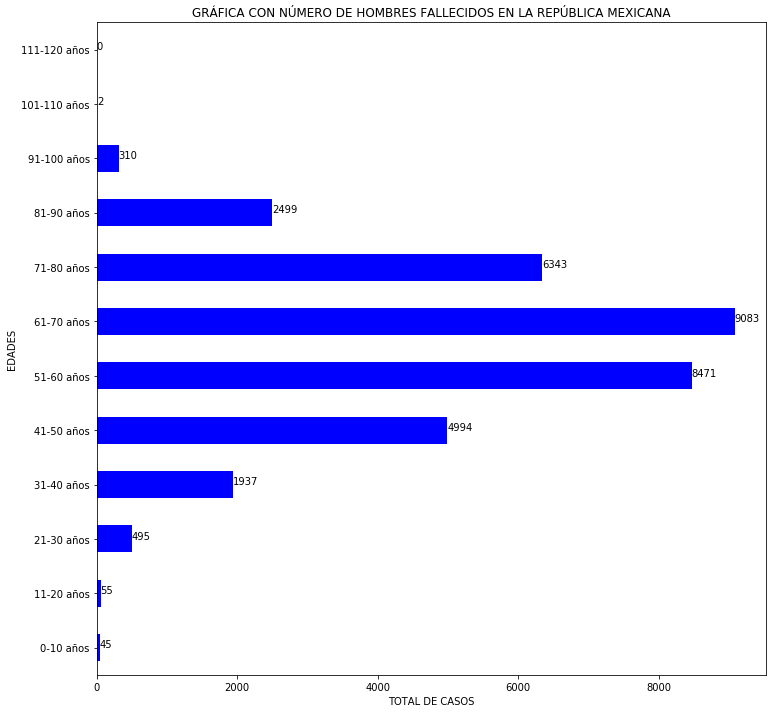

In [41]:
df_rangosH_fallecidos.plot(kind='barh',figsize=(12,12),color='blue')
plt.xlabel('TOTAL DE CASOS')
plt.ylabel('EDADES')
plt.title('GRÁFICA CON NÚMERO DE HOMBRES FALLECIDOS EN LA REPÚBLICA MEXICANA')
for index, value in enumerate(df_rangosH_fallecidos):
    plt.text(value, index, str(value)) #es una forma para mostrar los valores o también la que se encuentra a 
    #continuación
    #plt.annotate(label,xy=(value,index), color='black')
plt.show()

#### Se cambia el valor númerico de la Entidad por el texto que hace referencia a un Estado para futuros mapas, además de que lo hace más comprensible

In [42]:
df_covid_positivos["ENTIDAD_UM"] = df_covid_positivos["ENTIDAD_UM"].apply(lambda toLabel: 'Aguascalientes' if toLabel == 1 else 
                                         ('Baja California' if toLabel== 2 else 
                                         ('Baja California Sur' if toLabel== 3 else
                                         ('Campeche' if toLabel== 4 else
                                         ('Coahuila' if toLabel==5 else
                                         ('Colima' if toLabel==6 else
                                         ('Chiapas' if toLabel==7 else
                                         ('Chihuahua' if toLabel==8 else
                                         ('Ciudad de México' if toLabel==9 else 
                                         ('Durango' if toLabel==10 else
                                         ('Guanajuato' if toLabel==11 else
                                         ('Guerrero' if toLabel==12 else 
                                         ('Hidalgo' if toLabel==13 else
                                         ('Jalisco' if toLabel==14 else
                                         ('México' if toLabel==15 else
                                         ('Michoacán' if toLabel==16 else
                                         ('Morelos' if toLabel==17 else
                                         ('Nayarit' if toLabel==18 else
                                         ('Nuevo León' if toLabel==19 else
                                         ('Oaxaca' if toLabel==20 else
                                         ('Puebla' if toLabel==21 else
                                         ('Querétaro' if toLabel==22 else
                                         ('Quintana Roo' if toLabel==23 else
                                         ('San Luis Potosí' if toLabel==24 else
                                         ('Sinaloa' if toLabel==25 else
                                         ('Sonora' if toLabel==26 else
                                         ('Tabasco' if toLabel==27 else
                                         ('Tamaulipas' if toLabel==28 else
                                         ('Tlaxcala' if toLabel==29 else
                                         ('Veracruz' if toLabel==30 else
                                         ('Yucatán' if toLabel==31 else
                                         ('Zacatecas' if toLabel==32 else
                                         ('Estados Unidos Mexicanos' if toLabel==36 else
                                         ('No Aplica' if toLabel==97 else
                                         ('Se ignora' if toLabel==98 else 'No Especificado')))))))))))))))))))))

                                
                                    
                                         ))))))))))))))
df.head(50)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-10,1db186,2,3,15,MUJER,15,15,76,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-10,19b7a9,2,3,27,HOMBRE,27,27,13,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-10,1ae47a,2,4,9,MUJER,14,9,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-08-10,0e345e,2,4,30,MUJER,30,30,193,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-10,170aea,2,4,9,HOMBRE,15,15,104,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
5,2020-08-10,024dec,2,4,15,HOMBRE,9,15,13,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
6,2020-08-10,108e5f,2,4,9,MUJER,20,9,7,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
7,2020-08-10,045060,2,4,9,HOMBRE,9,9,15,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
8,2020-08-10,0b4b12,2,4,9,HOMBRE,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
9,2020-08-10,0181c9,2,3,15,HOMBRE,9,15,87,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


#### Se cambia el valor númerico de la Entidad por el texto que hace referencia a un Estado para futuros mapas, además de que lo hace más comprensible

In [43]:
df["ENTIDAD_UM"] = df["ENTIDAD_UM"].apply(lambda toLabel: 'Aguascalientes' if toLabel == 1 else 
                                         ('Baja California' if toLabel== 2 else 
                                         ('Baja California Sur' if toLabel== 3 else
                                         ('Campeche' if toLabel== 4 else
                                         ('Coahuila' if toLabel==5 else
                                         ('Colima' if toLabel==6 else
                                         ('Chiapas' if toLabel==7 else
                                         ('Chihuahua' if toLabel==8 else
                                         ('Ciudad de México' if toLabel==9 else 
                                         ('Durango' if toLabel==10 else
                                         ('Guanajuato' if toLabel==11 else
                                         ('Guerrero' if toLabel==12 else 
                                         ('Hidalgo' if toLabel==13 else
                                         ('Jalisco' if toLabel==14 else
                                         ('México' if toLabel==15 else
                                         ('Michoacán' if toLabel==16 else
                                         ('Morelos' if toLabel==17 else
                                         ('Nayarit' if toLabel==18 else
                                         ('Nuevo León' if toLabel==19 else
                                         ('Oaxaca' if toLabel==20 else
                                         ('Puebla' if toLabel==21 else
                                         ('Querétaro' if toLabel==22 else
                                         ('Quintana Roo' if toLabel==23 else
                                         ('San Luis Potosí' if toLabel==24 else
                                         ('Sinaloa' if toLabel==25 else
                                         ('Sonora' if toLabel==26 else
                                         ('Tabasco' if toLabel==27 else
                                         ('Tamaulipas' if toLabel==28 else
                                         ('Tlaxcala' if toLabel==29 else
                                         ('Veracruz' if toLabel==30 else
                                         ('Yucatán' if toLabel==31 else
                                         ('Zacatecas' if toLabel==32 else
                                         ('Estados Unidos Mexicanos' if toLabel==36 else
                                         ('No Aplica' if toLabel==97 else
                                         ('Se ignora' if toLabel==98 else 'No Especificado')))))))))))))))))))))

                                
                                    
                                         ))))))))))))))
df.head(50)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-10,1db186,2,3,México,MUJER,15,15,76,1,...,2,1,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-10,19b7a9,2,3,Tabasco,HOMBRE,27,27,13,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-10,1ae47a,2,4,Ciudad de México,MUJER,14,9,5,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-08-10,0e345e,2,4,Veracruz,MUJER,30,30,193,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-10,170aea,2,4,Ciudad de México,HOMBRE,15,15,104,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
5,2020-08-10,024dec,2,4,México,HOMBRE,9,15,13,1,...,2,2,2,1,99,1,99,MÃ©xico,99,97
6,2020-08-10,108e5f,2,4,Ciudad de México,MUJER,20,9,7,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
7,2020-08-10,045060,2,4,Ciudad de México,HOMBRE,9,9,15,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
8,2020-08-10,0b4b12,2,4,Ciudad de México,HOMBRE,9,9,7,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
9,2020-08-10,0181c9,2,3,México,HOMBRE,9,15,87,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


#### Se realiza un conteo de casos positivos por Estado para proceder a graficar

In [44]:
estados = df_covid_positivos['ENTIDAD_UM'].value_counts()
estados

Ciudad de México       97916
México                 41474
Tabasco                24736
Guanajuato             24548
Veracruz               23655
Puebla                 23037
Nuevo León             22186
Sonora                 19204
Tamaulipas             18040
Coahuila               15851
Jalisco                15421
Baja California        14461
Sinaloa                13825
San Luis Potosí        12689
Guerrero               12249
Yucatán                11757
Oaxaca                 11577
Michoacán              11451
Quintana Roo            8693
Hidalgo                 7763
Chihuahua               6087
Chiapas                 5722
Baja California Sur     5624
Campeche                5126
Durango                 4801
Tlaxcala                4684
Aguascalientes          4606
Querétaro               4555
Morelos                 4225
Nayarit                 3932
Zacatecas               3486
Colima                  2455
Name: ENTIDAD_UM, dtype: int64

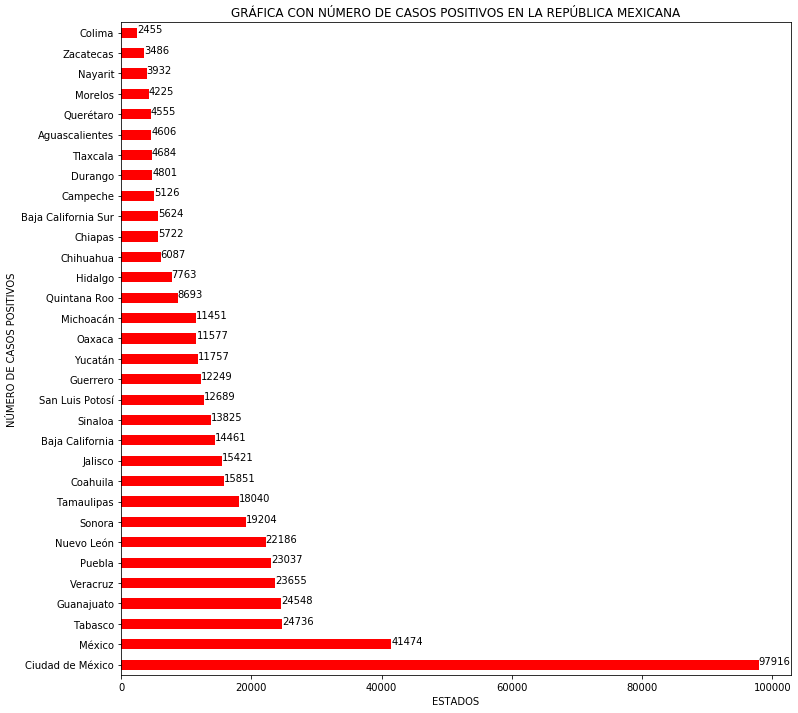

In [45]:
estados.plot(kind='barh',figsize=(12,12),color='red')
plt.xlabel('ESTADOS')
plt.ylabel('NÚMERO DE CASOS POSITIVOS')
plt.title('GRÁFICA CON NÚMERO DE CASOS POSITIVOS EN LA REPÚBLICA MEXICANA')
for index, value in enumerate(estados):
    plt.text(value, index, str(value)) #es una forma para mostrar los valores o también la que se encuentra a 
    #continuación
    #plt.annotate(label,xy=(value,index), color='black')
plt.show()

In [46]:
df_estados_total = df_covid_positivos.groupby(['ENTIDAD_UM']).sum()
df_estados_total['estados'] = estados
df_estados_total.head()

,ORIGEN,SECTOR,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI,estados
ENTIDAD_UM,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,6315,32149,19760,7194,16044,5684,344311,8671,188733,4619,...,22534,9384,8582,9149,8909,282597,4606,455411,344437,4606
Baja California,23368,107510,140085,30307,42415,19850,892888,24046,674984,14540,...,35756,35602,32369,35913,35441,797184,14461,1425314,893173,14461
Baja California Sur,8149,46440,52353,17042,26976,6358,475717,10570,231322,5652,...,12094,11925,10569,11963,11867,259578,5624,555321,475726,5624
Campeche,8380,47066,46869,25419,28355,6712,346455,9057,236561,5138,...,10758,10523,9553,10659,10478,155877,5126,506500,346339,5126
Chiapas,6912,44363,47334,40533,464388,7867,350974,10224,272676,5745,...,13245,12277,11131,12135,12282,283824,5722,564526,351031,5722


In [47]:
listaDeEstados = pd.unique(df_covid_positivos['ENTIDAD_UM']).tolist()
listaDeEstados.sort()
listaDeTotal = list(df_estados_total['estados'])
listaDeEstados

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Coahuila',
 'Colima',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatán',
 'Zacatecas']

In [48]:
CasosPorEstado = pd.DataFrame(listaDeEstados,columns=['Estados'])
CasosPorEstado['Total'] = listaDeTotal

In [49]:
CasosPorEstado

,Estados,Total
0,Aguascalientes,4606
1,Baja California,14461
2,Baja California Sur,5624
3,Campeche,5126
4,Chiapas,5722
5,Chihuahua,6087
6,Ciudad de México,97916
7,Coahuila,15851
8,Colima,2455
9,Durango,4801


#### Se rrealiza un filtrado para casos positivos en Durango para graficar

In [50]:
CovidDurango = df_covid_positivos['ENTIDAD_UM']=='Durango'
CovidDurango = df_covid_positivos[CovidDurango]
CovidDurango.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Rango
638,2020-08-10,09ad6f,2,4,Durango,MUJER,10,10,13,2,...,2,2,1,99,1,99,MÃ©xico,99,2,51-60 años
907,2020-08-10,16b8c6,2,4,Durango,MUJER,10,10,7,1,...,2,2,2,99,1,99,MÃ©xico,99,97,41-50 años
931,2020-08-10,00b160,2,4,Durango,HOMBRE,10,10,7,1,...,2,2,2,99,1,99,MÃ©xico,99,97,41-50 años
963,2020-08-10,1dd963,2,4,Durango,HOMBRE,10,10,7,1,...,2,2,2,99,1,99,MÃ©xico,99,97,31-40 años
1184,2020-08-10,103cf1,2,4,Durango,HOMBRE,10,10,12,1,...,2,2,1,99,1,99,MÃ©xico,99,97,51-60 años


In [51]:
len(CovidDurango)

4801

#### Se realiza un conteo de numero de ingreso a hospital por fecha

In [52]:
CovidDurango = CovidDurango.groupby(['FECHA_INGRESO']).size().reset_index(name='TOTAL')
CovidDurango

,FECHA_INGRESO,TOTAL
0,2020-03-11,1
1,2020-03-13,1
2,2020-03-14,1
3,2020-03-17,1
4,2020-03-18,1
...,...,...
124,2020-08-04,75
125,2020-08-05,86
126,2020-08-06,100
127,2020-08-07,52


#### Se crea una columna en donde se van sumando los casos con la columna de la fila anterior para posteriormente poderlo graficar

In [53]:
CovidDurango['Dia'] = list(map(int,range(1,len(CovidDurango)+1)))
CovidDurango['CasosAcumulados'] = CovidDurango['TOTAL'].cumsum()
CovidDurango

,FECHA_INGRESO,TOTAL,Dia,CasosAcumulados
0,2020-03-11,1,1,1
1,2020-03-13,1,2,2
2,2020-03-14,1,3,3
3,2020-03-17,1,4,4
4,2020-03-18,1,5,5
...,...,...,...,...
124,2020-08-04,75,125,4551
125,2020-08-05,86,126,4637
126,2020-08-06,100,127,4737
127,2020-08-07,52,128,4789


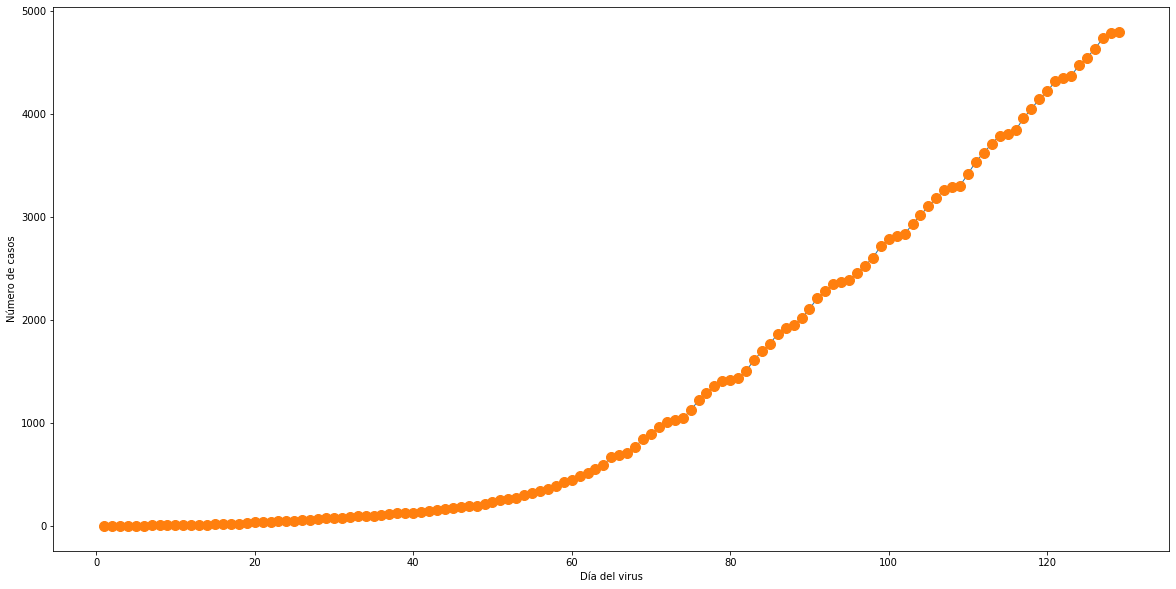

In [54]:
# Crea una figura un poco más grande usa todo el espacio disponible
plt.figure(figsize = (20,10))
# XY Gráfico del año y tráfico
x = CovidDurango.Dia
y = CovidDurango.CasosAcumulados
# XY Gráfico del año y tráfico
plt.plot(x, y, label =' ', linewidth = 1)
plt.plot(x, y,'o', markersize = 10, label = '')
# Aumente ligeramente los tamaños de los ejes para que la gráfica sea más clara
#plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])
# Agregar etiquetas de eje
plt.xlabel('Día del virus')
plt.ylabel('Número de casos')
# Aumentar el tamaño de fuente predeterminado
plt.rcParams.update({'font.size': 20})
plt.show()

#### Se realiza un conteo de numero de ingreso a hospital por fecha

In [55]:
CovidNacional = df_covid_positivos.groupby(['FECHA_INGRESO']).size().reset_index(name='TOTAL')
CovidNacional

,FECHA_INGRESO,TOTAL
0,2020-01-13,1
1,2020-01-29,1
2,2020-02-27,4
3,2020-02-28,2
4,2020-02-29,1
...,...,...
160,2020-08-06,3633
161,2020-08-07,2304
162,2020-08-08,517
163,2020-08-09,76


#### Se crea una columna en donde se van sumando los casos con la columna de la fila anterior para posteriormente poderlo graficar

In [56]:
CovidNacional['Dia'] = list(map(int,range(1,len(CovidNacional)+1)))
CovidNacional['CasosAcumulados'] = CovidNacional['TOTAL'].cumsum()
CovidNacional

,FECHA_INGRESO,TOTAL,Dia,CasosAcumulados
0,2020-01-13,1,1,1
1,2020-01-29,1,2,2
2,2020-02-27,4,3,6
3,2020-02-28,2,4,8
4,2020-02-29,1,5,9
...,...,...,...,...
160,2020-08-06,3633,161,482934
161,2020-08-07,2304,162,485238
162,2020-08-08,517,163,485755
163,2020-08-09,76,164,485831


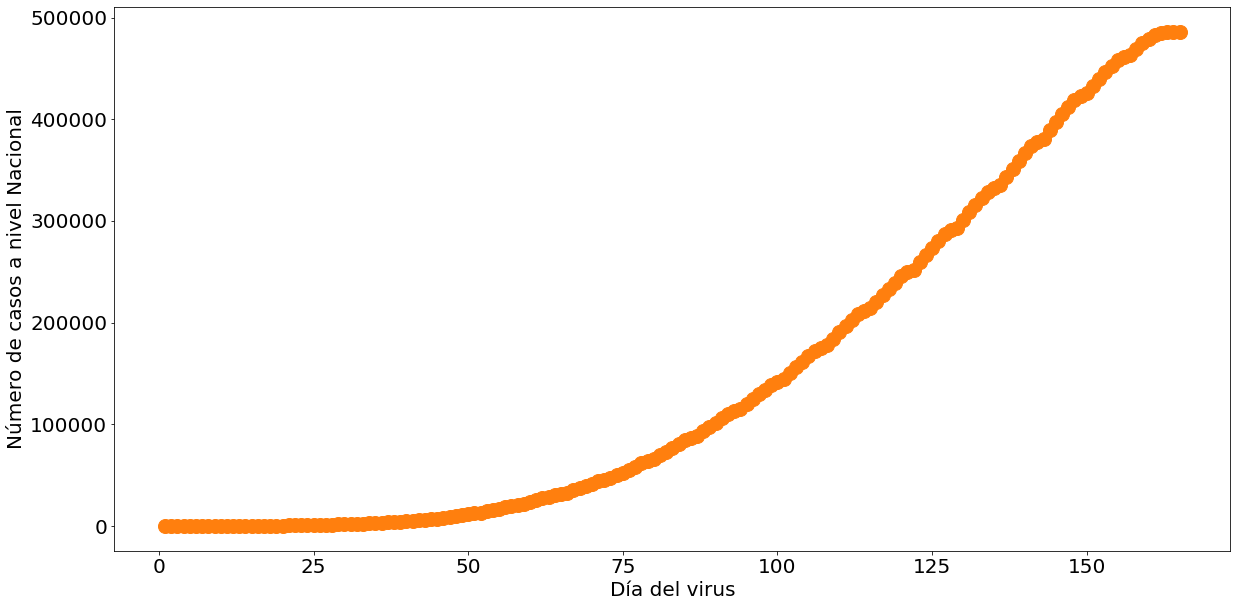

In [57]:
# Crea una figura un poco más grande usa todo el espacio disponible
plt.figure(figsize = (20,10))
# XY Gráfico del año y tráfico
x = CovidNacional.Dia
y = CovidNacional.CasosAcumulados
# XY Gráfico del año y tráfico
plt.plot(x, y, label =' ', linewidth = 1)
plt.plot(x, y,'o', markersize = 14, label = '')
# Aumente ligeramente los tamaños de los ejes para que la gráfica sea más clara
#plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])
# Agregar etiquetas de eje
plt.xlabel('Día del virus')
plt.ylabel('Número de casos a nivel Nacional')
# Aumentar el tamaño de fuente predeterminado
plt.rcParams.update({'font.size': 20})
plt.show()

In [58]:
#Se obtiene el numero de muertos y se filtra
MuertesCovid = df_covid_positivos['FECHA_DEF']!='9999-99-99'
MuertesCovid = df_covid_positivos[MuertesCovid]
MuertesCovid['FECHA_DEF']
len(MuertesCovid)

53003

In [59]:
estados_fallecidos = MuertesCovid['ENTIDAD_UM'].value_counts()

df_estados_total_fallecidos = MuertesCovid.groupby(['ENTIDAD_UM']).sum()
df_estados_total_fallecidos['estados'] = estados_fallecidos
df_estados_total_fallecidos.head()

listaDeEstadosFallecidos = pd.unique(MuertesCovid['ENTIDAD_UM']).tolist()
listaDeEstadosFallecidos.sort()
listaDeTotalFallecidos = list(df_estados_total_fallecidos['estados'])
listaDeEstadosFallecidos

['Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Chiapas',
 'Chihuahua',
 'Ciudad de México',
 'Coahuila',
 'Colima',
 'Durango',
 'Guanajuato',
 'Guerrero',
 'Hidalgo',
 'Jalisco',
 'Michoacán',
 'Morelos',
 'México',
 'Nayarit',
 'Nuevo León',
 'Oaxaca',
 'Puebla',
 'Querétaro',
 'Quintana Roo',
 'San Luis Potosí',
 'Sinaloa',
 'Sonora',
 'Tabasco',
 'Tamaulipas',
 'Tlaxcala',
 'Veracruz',
 'Yucatán',
 'Zacatecas']

In [60]:
CasosPorEstadoFallecido = pd.DataFrame(listaDeEstadosFallecidos,columns=['Estados'])
CasosPorEstadoFallecido['Total'] = listaDeTotalFallecidos
CasosPorEstadoFallecido

,Estados,Total
0,Aguascalientes,291
1,Baja California,2794
2,Baja California Sur,215
3,Campeche,616
4,Chiapas,953
5,Chihuahua,968
6,Ciudad de México,9472
7,Coahuila,916
8,Colima,279
9,Durango,341


#### Se ordena el número de casos por fecha para poder graficar

In [61]:
FechaIngresoOrden = df_covid_positivos.sort_values(by='FECHA_INGRESO')

In [62]:
FechaIngresoOrden2 = df_covid_positivos['FECHA_INGRESO'].value_counts()
FechaIngresoOrden = df_covid_positivos.groupby(['FECHA_INGRESO']).sum()
FechaIngresoOrden['Total'] = FechaIngresoOrden2
listaFechas = pd.unique(df_covid_positivos['FECHA_INGRESO']).tolist()
listaFechas.sort()
listaFechasTotal = list(FechaIngresoOrden['Total'])

graficaFechas = pd.DataFrame(listaFechas,columns=['Fechas'])
graficaFechas['Total'] = listaFechasTotal
graficaFechas


,Fechas,Total
0,2020-01-13,1
1,2020-01-29,1
2,2020-02-27,4
3,2020-02-28,2
4,2020-02-29,1
...,...,...
160,2020-08-06,3633
161,2020-08-07,2304
162,2020-08-08,517
163,2020-08-09,76


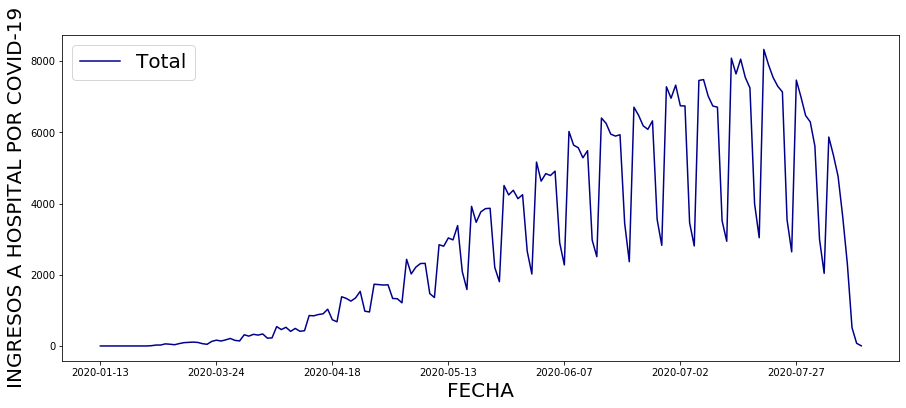

In [63]:
graficaFechas.plot(x='Fechas',y='Total', figsize=(15,6), color='darkblue', fontsize=10)
plt.title = ('NÚMERO DE INGRESOS A HOSPITAL POR COVID-19')
plt.xlabel('FECHA')
plt.ylabel('INGRESOS A HOSPITAL POR COVID-19')
plt.show()

In [64]:
world_geo = r'estados.json' #Mapa JSON de México

### Mapa de el número de Muertos en México

In [65]:
world_map = folium.Map(location=[0,0],zoom_start=2,tiles='Mapbox Bright')
world_map.choropleth(
geo_data=world_geo,
data = CasosPorEstadoFallecido,
columns=['Estados','Total'],
key_on='feature.properties.name',
fill_color='YlOrRd',
fill_opacity=0.9,
line_opacity=0.8,
legend_name='MUERTES COVID-19')
world_map

### Mapa de el número de Casos de COVID-18 en México

In [66]:
world_map = folium.Map(location=[0,0],zoom_start=2,tiles='Mapbox Bright')
world_map.choropleth(
geo_data=world_geo,
data = CasosPorEstado,
columns=['Estados','Total'],
key_on='feature.properties.name',
fill_color='YlOrRd',
fill_opacity=0.9,
line_opacity=0.8,
legend_name='CASOS COVID-19 TOTALES')
world_map